# EDA Chicago Food Inspections dataset

## 1. Exploratory data analysis and metric selection

### 1a. Look at, summarize, and clean the data


This dataset has is from [Chicago Department of Public Health’s Food Protection Program](https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5) public data from 2010-2021. This data is daily updated. It has over 200K valid data point and 17 features. All the features will be used for this project.

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or 'retina'
%matplotlib inline

sns.set(context='notebook', style='whitegrid')

In [2]:
food_data_prelim = pd.read_csv('data/Food_Inspections.csv')

In [3]:
food_data_prelim.tail()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
223355,114398,AMERICAN MEDICAL ASSOCIATION,AMERICAN MEDICAL ASSOCIATION,21129.0,Restaurant,Risk 1 (High),515 N STATE ST,CHICAGO,IL,60654.0,04/05/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.891418,-87.627915,"(-87.62791475607904, 41.89141810118847)"
223356,150294,DUNKIN DONUTS,DUNKIN DONUTS,1516830.0,Restaurant,Risk 2 (Medium),3843 N CICERO AVE,CHICAGO,IL,60641.0,03/24/2010,Short Form Complaint,Pass,NaN,41.951065,-87.747103,"(-87.74710290506961, 41.95106520855843)"
223357,88257,AWAMI BAZAAR & ZABIHA MEAT,AWAMI BAZAAR & ZABIHA MEAT,68226.0,Grocery Store,Risk 2 (Medium),2340 W DEVON AVE,CHICAGO,IL,60659.0,02/17/2010,Consultation,Pass,NaN,41.997854,-87.689064,"(-87.68906426569195, 41.99785368943807)"
223358,238247,COMMUNITY MEAT & PRODUCE,NaN,2027511.0,Grocery Store,Risk 2 (Medium),457 E 79th ST,CHICAGO,IL,60619.0,04/13/2010,License,Pass,NaN,41.751047,-87.612643,"(-87.61264331123509, 41.7510468251433)"
223359,176527,North-Grand H.S.,NORTH - GRAND HIGH SCHOOL,46431.0,School,Risk 1 (High),4338 W Wabansia,CHICAGO,IL,60639.0,03/08/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.911701,-87.735252,"(-87.73525151472917, 41.911700944024766)"


In [4]:
# Rename columns
food_data_prelim.rename(columns = {'DBA Name': 'Doing Business As', 'AKA Name': 'Also Known As'}, inplace= True)

In [5]:
# Remove columns I don't need City and State
food_data_prelim.drop(['Inspection ID', 'Doing Business As', 'Also Known As', 'License #', 'Address', 'City', 'State', 'Location'], axis = 1, inplace=True)

In [6]:
# Look for all Null and Nan
food_data_prelim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223360 entries, 0 to 223359
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Facility Type    218426 non-null  object 
 1   Risk             223289 non-null  object 
 2   Zip              223307 non-null  float64
 3   Inspection Date  223360 non-null  object 
 4   Inspection Type  223359 non-null  object 
 5   Results          223360 non-null  object 
 6   Violations       163531 non-null  object 
 7   Latitude         222599 non-null  float64
 8   Longitude        222599 non-null  float64
dtypes: float64(3), object(6)
memory usage: 15.3+ MB


In [7]:
# Replace Nan in Violation by None
food_data_prelim['Violations'] = food_data_prelim['Violations'].fillna('None')
food_data_prelim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223360 entries, 0 to 223359
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Facility Type    218426 non-null  object 
 1   Risk             223289 non-null  object 
 2   Zip              223307 non-null  float64
 3   Inspection Date  223360 non-null  object 
 4   Inspection Type  223359 non-null  object 
 5   Results          223360 non-null  object 
 6   Violations       223360 non-null  object 
 7   Latitude         222599 non-null  float64
 8   Longitude        222599 non-null  float64
dtypes: float64(3), object(6)
memory usage: 15.3+ MB


In [8]:
# Check missing values

food_data_prelim.isnull().sum().sort_values(ascending = False)

Facility Type      4934
Longitude           761
Latitude            761
Risk                 71
Zip                  53
Inspection Type       1
Violations            0
Results               0
Inspection Date       0
dtype: int64

In [9]:
food_data_prelim.dropna(subset = ['Facility Type'], inplace=True)

In [10]:
food_data_prelim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218426 entries, 0 to 223359
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Facility Type    218426 non-null  object 
 1   Risk             218410 non-null  object 
 2   Zip              218378 non-null  float64
 3   Inspection Date  218426 non-null  object 
 4   Inspection Type  218425 non-null  object 
 5   Results          218426 non-null  object 
 6   Violations       218426 non-null  object 
 7   Latitude         217679 non-null  float64
 8   Longitude        217679 non-null  float64
dtypes: float64(3), object(6)
memory usage: 16.7+ MB


In [11]:
type_quantity = food_data_prelim['Facility Type'].value_counts()
other_type = list(type_quantity[type_quantity<=100].index)

food_data_prelim['Facility Type'] = food_data_prelim['Facility Type'].replace(other_type, 'Other')

food_data_prelim = food_data_prelim[~(food_data_prelim['Facility Type'] == 'Other')]

In [12]:
type_quantity.head(19)

Restaurant                         149100
Grocery Store                       28880
School                              13825
Children's Services Facility         4002
Bakery                               3286
Daycare (2 - 6 Years)                2890
Daycare Above and Under 2 Years      2789
Long Term Care                       1494
Catering                             1354
Liquor                                998
Mobile Food Dispenser                 888
Daycare Combo 1586                    721
Mobile Food Preparer                  716
Golden Diner                          623
Hospital                              614
Wholesale                             544
TAVERN                                330
Daycare (Under 2 Years)               285
Special Event                         229
Name: Facility Type, dtype: int64

In [13]:
food_data_prelim['Facility Type'].drop_duplicates().head()

0                          Restaurant
2                       Grocery Store
11                             School
21    Daycare Above and Under 2 Years
29              Daycare (2 - 6 Years)
Name: Facility Type, dtype: object

In [14]:
food_data_prelim.shape

(214598, 9)

In [15]:
food_data_prelim.isnull().sum().sort_values(ascending = False)

Longitude          714
Latitude           714
Zip                 48
Risk                 5
Inspection Type      1
Violations           0
Results              0
Inspection Date      0
Facility Type        0
dtype: int64

In [16]:
food_data = food_data_prelim.dropna()
food_data.isnull().sum().sort_values(ascending = False)

Longitude          0
Latitude           0
Violations         0
Results            0
Inspection Type    0
Inspection Date    0
Zip                0
Risk               0
Facility Type      0
dtype: int64

In [17]:
# Count the number if Null in Results
count = food_data['Results'].count()
print(count)

213833


In [18]:
# Combine all the different Daycare

food_data['Facility Type'] = food_data['Facility Type'].replace('Daycare (2 - 6 Years)', 'Daycare')
food_data['Facility Type'] = food_data['Facility Type'].replace('Daycare Above and Under 2 Years', 'Daycare')
food_data['Facility Type'] = food_data['Facility Type'].replace('Daycare Combo 1586', 'Daycare')
food_data['Facility Type'] = food_data['Facility Type'].replace('Daycare (Under 2 Years)', 'Daycare')
type_quantity2 = food_data['Facility Type'].value_counts()
type_quantity2.head(25)



<ipython-input-18-f30397090370>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['Facility Type'] = food_data['Facility Type'].replace('Daycare (2 - 6 Years)', 'Daycare')
<ipython-input-18-f30397090370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['Facility Type'] = food_data['Facility Type'].replace('Daycare Above and Under 2 Years', 'Daycare')
<ipython-input-18-f30397090370>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Restaurant                         148924
Grocery Store                       28848
School                              13467
Daycare                              6684
Children's Services Facility         4002
Bakery                               3286
Long Term Care                       1487
Catering                             1354
Liquor                                991
Mobile Food Dispenser                 807
Mobile Food Preparer                  671
Golden Diner                          614
Hospital                              604
Wholesale                             544
TAVERN                                330
Special Event                         227
Shared Kitchen User (Long Term)       185
BANQUET HALL                          164
GAS STATION                           159
Shared Kitchen                        155
Mobile Prepared Food Vendor           114
Shelter                               110
KIOSK                                 106
Name: Facility Type, dtype: int64

In [19]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213833 entries, 0 to 223359
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Facility Type    213833 non-null  object 
 1   Risk             213833 non-null  object 
 2   Zip              213833 non-null  float64
 3   Inspection Date  213833 non-null  object 
 4   Inspection Type  213833 non-null  object 
 5   Results          213833 non-null  object 
 6   Violations       213833 non-null  object 
 7   Latitude         213833 non-null  float64
 8   Longitude        213833 non-null  float64
dtypes: float64(3), object(6)
memory usage: 16.3+ MB


In [20]:
# Change dtype on Inspection Date from object to datetime

food_data['Inspection Date'] = pd.to_datetime(food_data['Inspection Date'])
food_data.info()

<ipython-input-20-fb9f71362a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['Inspection Date'] = pd.to_datetime(food_data['Inspection Date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 213833 entries, 0 to 223359
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Facility Type    213833 non-null  object        
 1   Risk             213833 non-null  object        
 2   Zip              213833 non-null  float64       
 3   Inspection Date  213833 non-null  datetime64[ns]
 4   Inspection Type  213833 non-null  object        
 5   Results          213833 non-null  object        
 6   Violations       213833 non-null  object        
 7   Latitude         213833 non-null  float64       
 8   Longitude        213833 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 16.3+ MB


In [21]:
results_quantity = food_data['Results'].value_counts()
#other_type = list(type_quantity[type_quantity<=100].index)
minority = list(results_quantity[results_quantity<=20000].index)

food_data['Results'] = food_data['Results'].replace(minority, 'Other')

food_data = food_data[~(food_data['Results'] == 'Other')]

food_data['Results'].value_counts().head(10)

<ipython-input-21-d61632d9324f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['Results'] = food_data['Results'].replace(minority, 'Other')


Pass                  113525
Fail                   41782
Pass w/ Conditions     33649
Name: Results, dtype: int64

In [22]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188956 entries, 0 to 223359
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Facility Type    188956 non-null  object        
 1   Risk             188956 non-null  object        
 2   Zip              188956 non-null  float64       
 3   Inspection Date  188956 non-null  datetime64[ns]
 4   Inspection Type  188956 non-null  object        
 5   Results          188956 non-null  object        
 6   Violations       188956 non-null  object        
 7   Latitude         188956 non-null  float64       
 8   Longitude        188956 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 14.4+ MB


In [23]:
# Save to .csv
food_data.to_csv('data/clean_food_data.csv')

### 1b. Scope out classification viability

In [24]:
# Load my clean data
df = pd.read_csv('data/clean_food_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188956 entries, 0 to 188955
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       188956 non-null  int64  
 1   Facility Type    188956 non-null  object 
 2   Risk             188956 non-null  object 
 3   Zip              188956 non-null  float64
 4   Inspection Date  188956 non-null  object 
 5   Inspection Type  188956 non-null  object 
 6   Results          188956 non-null  object 
 7   Violations       188956 non-null  object 
 8   Latitude         188956 non-null  float64
 9   Longitude        188956 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 14.4+ MB


In [25]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188956 entries, 0 to 188955
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       188956 non-null  int64         
 1   Facility Type    188956 non-null  object        
 2   Risk             188956 non-null  object        
 3   Zip              188956 non-null  float64       
 4   Inspection Date  188956 non-null  datetime64[ns]
 5   Inspection Type  188956 non-null  object        
 6   Results          188956 non-null  object        
 7   Violations       188956 non-null  object        
 8   Latitude         188956 non-null  float64       
 9   Longitude        188956 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 14.4+ MB


In [27]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Facility Type,Risk,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,Restaurant,Risk 1 (High),60630.0,2010-01-15,Out of Business,Pass,None,41.975472,-87.767388
1,Restaurant,Risk 1 (High),60654.0,2010-01-11,Suspected Food Poisoning,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.888074,-87.634955
2,Grocery Store,Risk 3 (Low),60643.0,2010-01-27,Complaint Re-Inspection,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.706992,-87.646626
3,Restaurant,Risk 1 (High),60618.0,2010-01-07,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.954083,-87.698303
4,Restaurant,Risk 1 (High),60639.0,2010-01-12,Complaint Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.919224,-87.767734


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188956 entries, 0 to 188955
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Facility Type    188956 non-null  object        
 1   Risk             188956 non-null  object        
 2   Zip              188956 non-null  float64       
 3   Inspection Date  188956 non-null  datetime64[ns]
 4   Inspection Type  188956 non-null  object        
 5   Results          188956 non-null  object        
 6   Violations       188956 non-null  object        
 7   Latitude         188956 non-null  float64       
 8   Longitude        188956 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 13.0+ MB


In [29]:
df.dtypes

Facility Type              object
Risk                       object
Zip                       float64
Inspection Date    datetime64[ns]
Inspection Type            object
Results                    object
Violations                 object
Latitude                  float64
Longitude                 float64
dtype: object

In [30]:
def date_to_season(date):
    winter = [12, 1, 2]
    spring = [3, 4, 5]
    summer = [6, 7, 8]
    fall = [9, 10, 11]
    
    if date.month in winter:
        return "Winter"
    elif date.month in spring:
        return "Spring"
    elif date.month in summer:
        return "Summer"
    else:
        return "Fall"

In [31]:
df['Inspection Season'] = df['Inspection Date'].apply(date_to_season)

In [32]:
df

,Facility Type,Risk,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Inspection Season
0,Restaurant,Risk 1 (High),60630.0,2010-01-15,Out of Business,Pass,None,41.975472,-87.767388,Winter
1,Restaurant,Risk 1 (High),60654.0,2010-01-11,Suspected Food Poisoning,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.888074,-87.634955,Winter
2,Grocery Store,Risk 3 (Low),60643.0,2010-01-27,Complaint Re-Inspection,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.706992,-87.646626,Winter
3,Restaurant,Risk 1 (High),60618.0,2010-01-07,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.954083,-87.698303,Winter
4,Restaurant,Risk 1 (High),60639.0,2010-01-12,Complaint Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.919224,-87.767734,Winter
...,...,...,...,...,...,...,...,...,...,...
188951,Restaurant,Risk 1 (High),60654.0,2010-04-05,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.891418,-87.627915,Spring
188952,Restaurant,Risk 2 (Medium),60641.0,2010-03-24,Short Form Complaint,Pass,None,41.951065,-87.747103,Spring
188953,Grocery Store,Risk 2 (Medium),60659.0,2010-02-17,Consultation,Pass,None,41.997854,-87.689064,Winter
188954,Grocery Store,Risk 2 (Medium),60619.0,2010-04-13,License,Pass,None,41.751047,-87.612643,Spring


In [33]:
type_quantity3 = food_data['Results'].value_counts()
type_quantity3.head()



Pass                  113525
Fail                   41782
Pass w/ Conditions     33649
Name: Results, dtype: int64

In [34]:
df.dtypes

Facility Type                object
Risk                         object
Zip                         float64
Inspection Date      datetime64[ns]
Inspection Type              object
Results                      object
Violations                   object
Latitude                    float64
Longitude                   float64
Inspection Season            object
dtype: object

In [45]:
#df['Violations'].value_counts().head(20)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
# Create a df for categorical
df_cat = df.loc[:,['Facility Type', 'Risk', 'Inspection Type', 'Results', 'Violations', 'Inspection Season', 'Inspection Date']]
df_cat = df_cat.apply(LabelEncoder().fit_transform)

In [38]:
type_quantity4 = df_cat['Results'].value_counts()
type_quantity4.head()


1    113525
0     41782
2     33649
Name: Results, dtype: int64

In [39]:
df_cat

# Save to .csv
df_cat.to_csv('data/df_cat.csv')

In [40]:
# Create a df for numerical
df_num = df.loc[:,['Zip', 'Latitude', 'Longitude']]
df_num
# Save to .csv
df_num.to_csv('data/df_num.csv')

In [41]:
df_united = df_num.merge(df_cat, left_index=True, right_index=True)
df_united.head()
# Save to .csv
df_united.to_csv('data/df.csv')

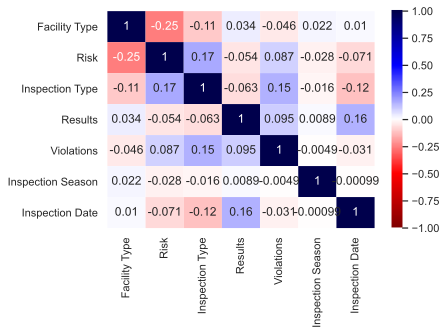

In [42]:
sns.heatmap(df_cat.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)
plt.savefig("./charts/heat_map_cat.png", bbox_inches='tight')

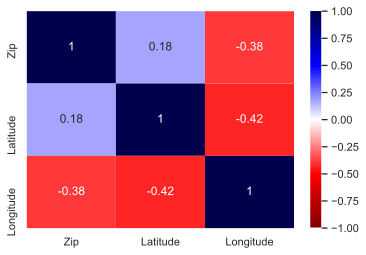

In [43]:
sns.heatmap(df_num.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)
plt.savefig("./charts/heat_map_num.png", bbox_inches='tight')

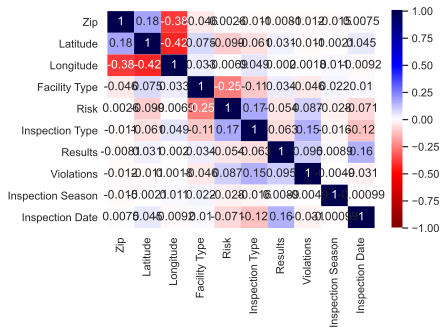

In [44]:
sns.heatmap(df_united.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)
plt.savefig("./charts/heat_map_united.png", bbox_inches='tight')